In [66]:
import pandas as pd
df = pd.read_csv("data_penjualan_motor_2025.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   tanggal            36 non-null     object
 1   dealer             36 non-null     object
 2   merk               36 non-null     object
 3   tipe_motor         36 non-null     object
 4   kategori           36 non-null     object
 5   harga              36 non-null     int64 
 6   qty                36 non-null     int64 
 7   metode_pembayaran  36 non-null     object
 8   kota               36 non-null     object
 9   total_penjualan    36 non-null     int64 
dtypes: int64(3), object(7)
memory usage: 2.9+ KB


In [86]:
#Cek Missing Value
df.isnull().sum()


,0
tanggal,0
dealer,0
merk,0
tipe_motor,0
kategori,0
harga,0
qty,0
metode_pembayaran,0
kota,0
total_penjualan,0


In [88]:
#Hapus Duplikat
df = df.drop_duplicates()


In [67]:
df['tanggal'] = pd.to_datetime(df['tanggal'])
df['bulan'] = df['tanggal'].dt.month


In [68]:
monthly_sales = df.groupby('bulan')['total_penjualan'].sum()
monthly_sales


,total_penjualan
bulan,
1,616000000
2,525000000
3,661000000
4,538500000
5,569500000
6,404600000
7,568600000
8,417500000
9,466000000


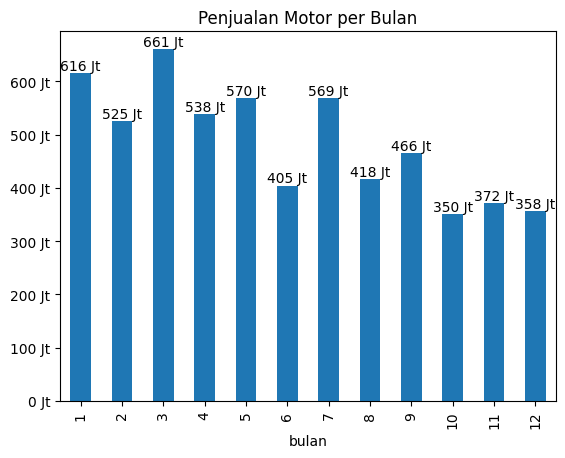

In [69]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

ax = monthly_sales.plot(kind='bar', title='Penjualan Motor per Bulan')

ax.yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, _: f'{x/1e6:.0f} Jt')
)

for i, v in enumerate(monthly_sales):
    ax.text(i, v, f'{v/1e6:.0f} Jt', ha='center', va='bottom')

plt.show()


In [82]:
df.groupby(['bulan', 'metode_pembayaran'] ) ['total_penjualan']. sum()

bulan  metode_pembayaran
1      Cash                 144000000
       Kredit               472000000
2      Cash                 140000000
       Kredit               385000000
3      Cash                 144000000
       Kredit               517000000
4      Cash                 195000000
       Kredit               343500000
5      Cash                 146000000
       Kredit               423500000
6      Cash                 105000000
       Kredit               299600000
7      Cash                 129600000
       Kredit               439000000
8      Cash                 132000000
       Kredit               285500000
9      Cash                 114000000
       Kredit               352000000
10     Cash                 111000000
       Kredit               239200000
11     Cash                  99000000
       Kredit               272900000
12     Cash                 134000000
       Kredit               223500000
Name: total_penjualan, dtype: int64

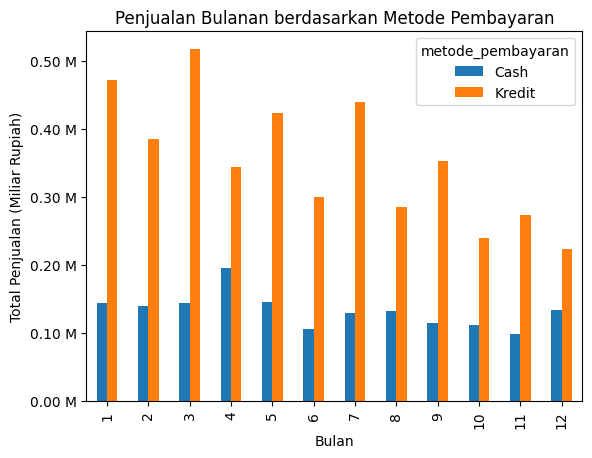

In [83]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

grouped = df.groupby(['bulan', 'metode_pembayaran'])['total_penjualan'].sum().unstack()

ax = grouped.plot(
    kind='bar',
    title='Penjualan Bulanan berdasarkan Metode Pembayaran',
    xlabel='Bulan',
    ylabel='Total Penjualan (Miliar Rupiah)'
)

ax.yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, _: f'{x/1e9:.2f} M')
)

plt.show()


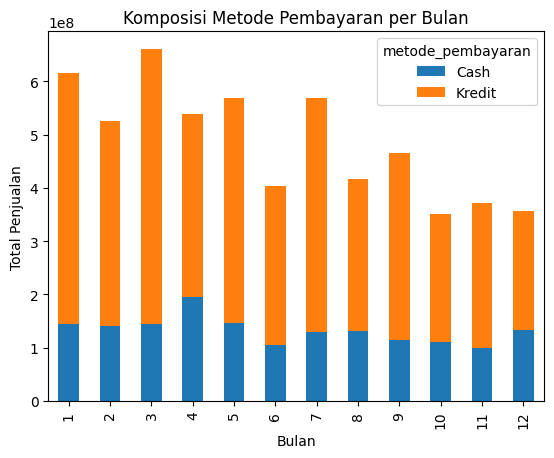

In [84]:
grouped = df.groupby(['bulan', 'metode_pembayaran'])['total_penjualan'].sum().unstack()

grouped.plot(
    kind='bar',
    stacked=True,
    title='Komposisi Metode Pembayaran per Bulan',
    xlabel='Bulan',
    ylabel='Total Penjualan'
)

plt.show()


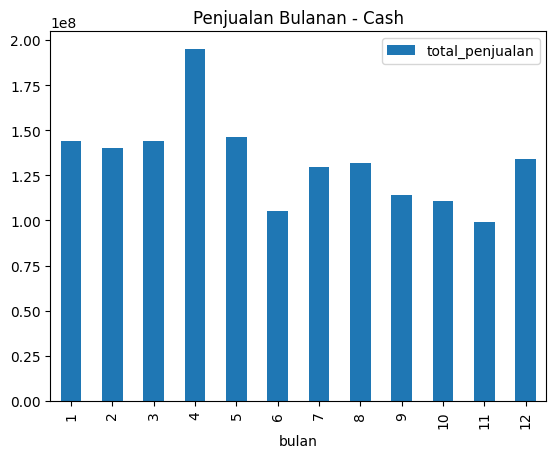

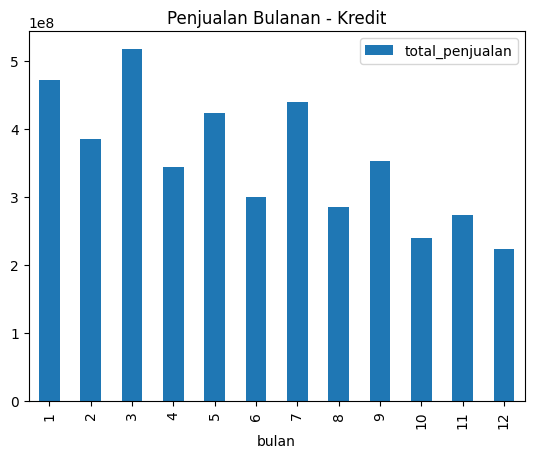

In [85]:
grouped = df.groupby(['bulan', 'metode_pembayaran'])['total_penjualan'].sum().reset_index()

for metode in grouped['metode_pembayaran'].unique():
    subset = grouped[grouped['metode_pembayaran'] == metode]
    subset.plot(
        x='bulan',
        y='total_penjualan',
        kind='bar',
        title=f'Penjualan Bulanan - {metode}'
    )
    plt.show()


In [70]:
merk_sales = df.groupby('merk')['total_penjualan'].sum()
merk_sales


,total_penjualan
merk,
Honda,3037300000
Kawasaki,461000000
Suzuki,359000000
Yamaha,1989000000


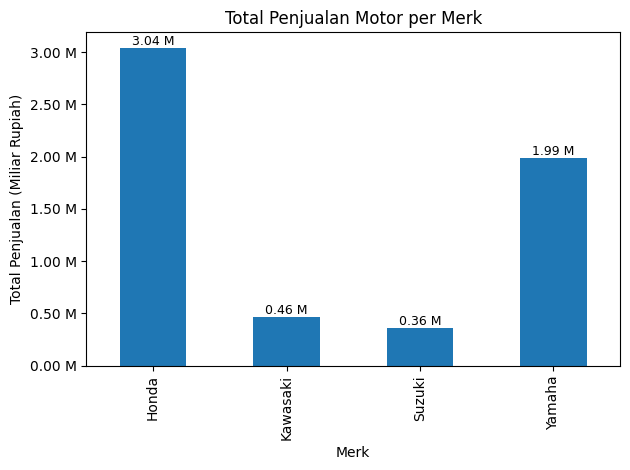

In [93]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

ax = merk_sales.plot(
    kind='bar',
    title='Total Penjualan Motor per Merk',
    xlabel='Merk',
    ylabel='Total Penjualan (Miliar Rupiah)'
)

# Format sumbu Y ke MILIAR
ax.yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, _: f'{x/1e9:.2f} M')
)

# Tambahkan nilai di atas bar
for i, v in enumerate(merk_sales):
    ax.text(i, v, f'{v/1e9:.2f} M', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


In [72]:
kota_sales = df.groupby('kota')['total_penjualan'].sum()
kota_sales


,total_penjualan
kota,
Bandung,1989000000
Jakarta,2263700000
Surabaya,1593600000


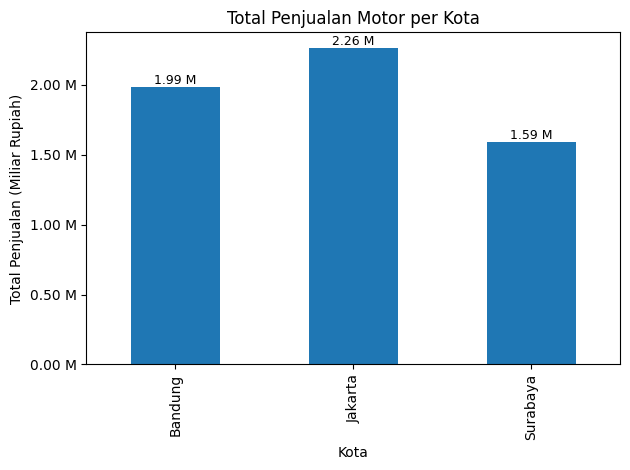

In [94]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Bar chart
ax = kota_sales.plot(
    kind='bar',
    title='Total Penjualan Motor per Kota',
    xlabel='Kota',
    ylabel='Total Penjualan (Miliar Rupiah)'
)

# Format sumbu Y ke MILIAR
ax.yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, _: f'{x/1e9:.2f} M')
)

# Tambahkan nilai di atas bar
for i, v in enumerate(kota_sales):
    ax.text(i, v, f'{v/1e9:.2f} M', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()
